In [46]:
# Import Libraries
import pandas as pd
import os 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


#### Task 1 - Merge the 12 Months of Data Together

In [22]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

# Review code below for study
files = [file for file in os.listdir('./Sales_Data')]

all_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, df])

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Clean Data!!

In [32]:
# Dealing w/ Nan Values
all_data = nan_df = all_data.dropna(how='all')

In [34]:
# Error coming up in later code due to 'Or' being in the date column - Filter Data to see what's going on
temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']

# Code above has identified where the column names are duplicated to the rows
# Use != to get the code that doesn't have duplicate colun names and set it to the df

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert Columns to Correct data types

In [40]:
# pd.to_numeric is a handy way to make data types numeric without having to specify a float or in

all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1377808215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1377808215.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


Question 1: What was the best month for Sales? How much was earned that month?
- Clean data
- Create Month Column
- Create Sales Column
- Create Visual for monthly sales data

In [35]:
all_data["Month"] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int')
all_data.head()

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1028818505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data['Order Date'].str[0:2]
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1028818505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month'] = all_data['Month'].astype('int')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Add Sales Column

In [39]:
all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1811518951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales Value'] = all_data['Quantity Ordered']*all_data['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Group the data by month to see which is the top performer

In [52]:
results = all_data.groupby('Month').sum()

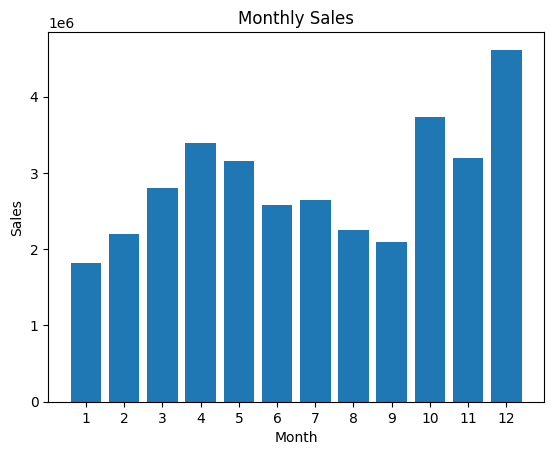

In [55]:
months = range(1,13)

plt.bar(months, results['Sales Value'])
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(months)
plt.show()

Q2 - What City makes the most revenue?
- First add City Column

In [65]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

all_data.drop(columns=['Column'], inplace=True)
all_data

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1351598102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/1351598102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.drop(columns=['Column'], inplace=True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco


In [71]:
city_sales = all_data.groupby('City').sum()['Sales Value'].sort_values(ascending=False)
print(city_sales)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales Value, dtype: float64


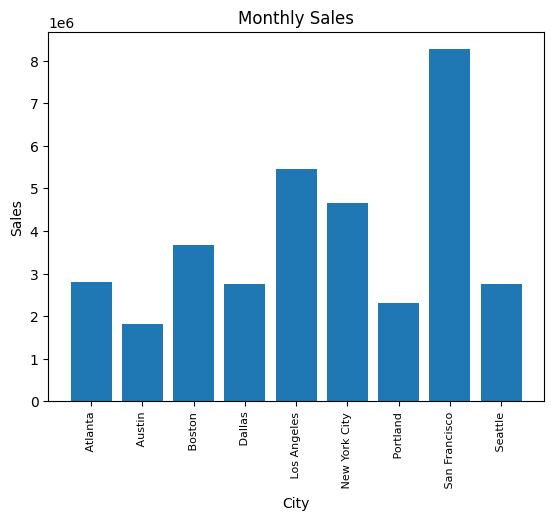

In [76]:
cities = [city for city, df in all_data.groupby('City')]
results_1 = all_data.groupby('City').sum()

plt.bar(cities, results_1['Sales Value'])
plt.title('Monthly Sales')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.show()

#### Question 3 - What is the best time to push advertisments?

In [86]:
#all_data['Order Time'] = all_data['Order Date'].str[-5:]

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/905675768.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/905675768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [88]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/2962922135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour'] = all_data['Order Date'].dt.hour
/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/2962922135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Minute'] = all_data['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Value,City,Order Time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,00:01,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,07:03,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18:21,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15:13,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12:38,12,38


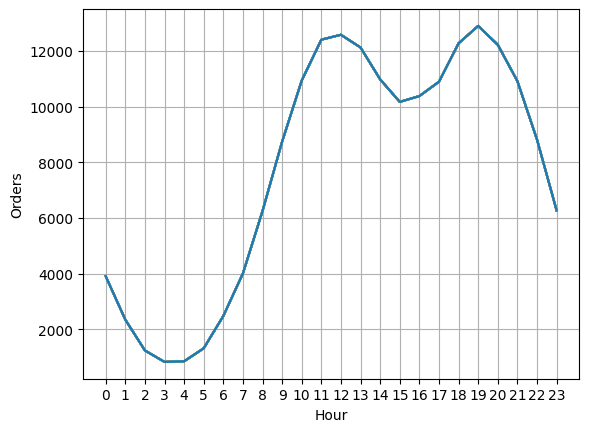

In [92]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xlabel('Hour')
plt.ylabel('Orders')
plt.xticks(hours)
plt.grid()
plt.show()

# Recommended time for advertising would be 10-11am 7 5-6pm

## Review**

#### Q4 What products are most oftern sold together?

In [102]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df

/var/folders/0d/mbrvmyx10n92tdtbjzgv0tjm0000gn/T/ipykernel_85095/729883513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
13570,222863,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,"iPhone,Apple Airpods Headphones"
13591,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,"Google Phone,USB-C Charging Cable"


In [107]:
from itertools import combinations 
from collections import Counter 

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Q5 - What product sold the most and why?
- First group by product and sum order quantity
- Sort values in descending order by order quantity
- Review results

In [118]:
prod_group = all_data.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Price Each': 'mean'
}).reset_index().sort_values(by='Quantity Ordered', ascending=False)

print(prod_group)


                       Product  Quantity Ordered  Price Each
5       AAA Batteries (4-pack)             31017        2.99
4        AA Batteries (4-pack)             27635        3.84
15        USB-C Charging Cable             23975       11.95
12    Lightning Charging Cable             23217       14.95
17            Wired Headphones             20557       11.99
6     Apple Airpods Headphones             15661      150.00
7   Bose SoundSport Headphones             13457       99.99
2             27in FHD Monitor              7550      149.99
18                      iPhone              6849      700.00
1       27in 4K Gaming Monitor              6244      389.99
3       34in Ultrawide Monitor              6199      379.99
9                 Google Phone              5532      600.00
8                Flatscreen TV              4819      300.00
13          Macbook Pro Laptop              4728     1700.00
14             ThinkPad Laptop              4130      999.99
0                 20in M

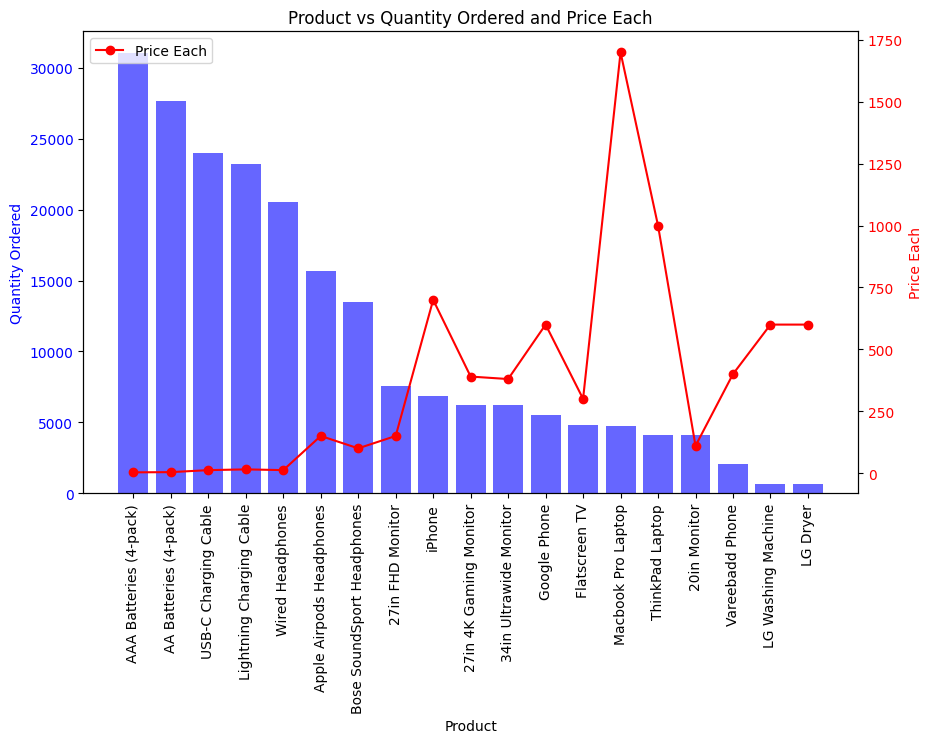

In [122]:
import matplotlib.pyplot as plt

# Create a figure and set the size
plt.figure(figsize=(10, 6))

# Plot 'Quantity Ordered' on the primary y-axis using plt.bar
plt.bar(prod_group['Product'], prod_group['Quantity Ordered'], color='b', alpha=0.6, label='Quantity Ordered')
plt.xlabel('Product')
plt.xticks(rotation='vertical')
plt.ylabel('Quantity Ordered', color='b')
plt.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
plt.twinx()
plt.plot(prod_group['Product'], prod_group['Price Each'], color='r', marker='o', label='Price Each')
plt.ylabel('Price Each', color='r')
plt.tick_params(axis='y', labelcolor='r')

# Title and legend
plt.title('Product vs Quantity Ordered and Price Each')
plt.legend(loc='upper left')

# Show the plot
plt.show()
